In [1]:
import wandb
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


api = wandb.Api()

In [34]:
def plot_accuracy_vs_supervision_ratio(summary_list, config_list, name_list):
    curriculum_ids = [i for i, name in enumerate(name_list) if name.startswith("curriculum")]
    suponly_ids = [i for i, name in enumerate(name_list) if name.startswith("suponly")]

    curriculum_supervision_ratios = [config_list[i]['datamodule']['dataset_parameters']['supervision_ratio'][0] for i in curriculum_ids]
    suponly_supervision_ratios = [config_list[i]['datamodule']['dataset_parameters']['supervision_ratio'][0] for i in suponly_ids]

    curriculum_z_sentence_test_acc_means = [summary_list[i]['test/autoreg_hidden_layer/sentence-accuracy-mean/Z'] for i in curriculum_ids]
    curriculum_z_sentence_test_acc_stds = [summary_list[i]['test/autoreg_hidden_layer/sentence-accuracy-std/Z'] for i in curriculum_ids]
    curriculum_z_word_test_acc_means = [summary_list[i]['test/autoreg_hidden_layer/accuracy-mean/Z'] for i in curriculum_ids]
    curriculum_z_word_test_acc_stds = [summary_list[i]['test/autoreg_hidden_layer/accuracy-std/Z'] for i in curriculum_ids]

    curriculum_x_sentence_test_acc_means = [summary_list[i]['test/autoreg_hidden_layer/sentence-accuracy-mean/X'] for i in curriculum_ids]
    curriculum_x_sentence_test_acc_stds = [summary_list[i]['test/autoreg_hidden_layer/sentence-accuracy-std/X'] for i in curriculum_ids]
    curriculum_x_word_test_acc_means = [summary_list[i]['test/autoreg_hidden_layer/accuracy-mean/X'] for i in curriculum_ids]
    curriculum_x_word_test_acc_stds = [summary_list[i]['test/autoreg_hidden_layer/accuracy-std/X'] for i in curriculum_ids]

    suponly_z_sentence_test_acc_means = [summary_list[i]['test/autoreg_hidden_layer/sentence-accuracy-mean/Z'] for i in suponly_ids]
    suponly_z_sentence_test_acc_stds = [summary_list[i]['test/autoreg_hidden_layer/sentence-accuracy-std/Z'] for i in suponly_ids]
    suponly_z_word_test_acc_means = [summary_list[i]['test/autoreg_hidden_layer/accuracy-mean/Z'] for i in suponly_ids]
    suponly_z_word_test_acc_stds = [summary_list[i]['test/autoreg_hidden_layer/accuracy-std/Z'] for i in suponly_ids]

    suponly_x_sentence_test_acc_means = [summary_list[i]['test/autoreg_hidden_layer/sentence-accuracy-mean/X'] for i in suponly_ids]
    suponly_x_sentence_test_acc_stds = [summary_list[i]['test/autoreg_hidden_layer/sentence-accuracy-std/X'] for i in suponly_ids]
    suponly_x_word_test_acc_means = [summary_list[i]['test/autoreg_hidden_layer/accuracy-mean/X'] for i in suponly_ids]
    suponly_x_word_test_acc_stds = [summary_list[i]['test/autoreg_hidden_layer/accuracy-std/X'] for i in suponly_ids]       

    # plotting the X and Z test accuracies, with error bars, 2*2 subplots with shaded error bars
    # sharing the x and y axes, and a legend, logarithmic x axis
    fig, axs = plt.subplots(2, 2, figsize=(10, 7), sharex=True, sharey=True)
    fig.suptitle('Test Accuracy vs Supervision Ratio')
    clrs = sns.color_palette("husl", 5)
    with sns.axes_style("darkgrid"):
        axs[0, 0].set_title('Z Sentence Accuracy')
        axs[0, 0].set_xlabel('Supervision Ratio')
        axs[0, 0].set_ylabel('Accuracy')
        axs[0, 0].set_xscale('log')
        axs[0, 0].plot(curriculum_supervision_ratios, curriculum_z_sentence_test_acc_means, label='curriculum', color=clrs[0])
        axs[0, 0].plot(suponly_supervision_ratios, suponly_z_sentence_test_acc_means, label='suponly', color=clrs[1])
        axs[0,0].fill_between(curriculum_supervision_ratios, np.array(curriculum_z_sentence_test_acc_means) - np.array(curriculum_z_sentence_test_acc_stds), np.array(curriculum_z_sentence_test_acc_means) + np.array(curriculum_z_sentence_test_acc_stds), alpha=0.2, color=clrs[0])
        axs[0,0].fill_between(suponly_supervision_ratios, np.array(suponly_z_sentence_test_acc_means) - np.array(suponly_z_sentence_test_acc_stds), np.array(suponly_z_sentence_test_acc_means) + np.array(suponly_z_sentence_test_acc_stds), alpha=0.2, color=clrs[1])
        axs[0, 0].legend()

        axs[0, 1].set_title('Z Word Accuracy')
        axs[0, 1].set_xlabel('Supervision Ratio')
        axs[0, 1].set_ylabel('Accuracy')
        axs[0, 1].set_xscale('log')
        axs[0, 1].plot(curriculum_supervision_ratios, curriculum_z_word_test_acc_means, label='curriculum', color=clrs[0])
        axs[0, 1].plot(suponly_supervision_ratios, suponly_z_word_test_acc_means, label='suponly', color=clrs[1])
        axs[0,1].fill_between(curriculum_supervision_ratios, np.array(curriculum_z_word_test_acc_means) - np.array(curriculum_z_word_test_acc_stds), np.array(curriculum_z_word_test_acc_means) + np.array(curriculum_z_word_test_acc_stds), alpha=0.2, color=clrs[0])
        axs[0,1].fill_between(suponly_supervision_ratios, np.array(suponly_z_word_test_acc_means) - np.array(suponly_z_word_test_acc_stds), np.array(suponly_z_word_test_acc_means) + np.array(suponly_z_word_test_acc_stds), alpha=0.2, color=clrs[1])
        axs[0, 1].legend()

        axs[1, 0].set_title('X Sentence Accuracy')
        axs[1, 0].set_xlabel('Supervision Ratio')
        axs[1, 0].set_ylabel('Accuracy')
        axs[1, 0].set_xscale('log')
        axs[1, 0].plot(curriculum_supervision_ratios, curriculum_x_sentence_test_acc_means, label='curriculum', color=clrs[0])
        axs[1, 0].plot(suponly_supervision_ratios, suponly_x_sentence_test_acc_means, label='suponly', color=clrs[1])
        axs[1,0].fill_between(curriculum_supervision_ratios, np.array(curriculum_x_sentence_test_acc_means) - np.array(curriculum_x_sentence_test_acc_stds), np.array(curriculum_x_sentence_test_acc_means) + np.array(curriculum_x_sentence_test_acc_stds), alpha=0.2, color=clrs[0])
        axs[1,0].fill_between(suponly_supervision_ratios, np.array(suponly_x_sentence_test_acc_means) - np.array(suponly_x_sentence_test_acc_stds), np.array(suponly_x_sentence_test_acc_means) + np.array(suponly_x_sentence_test_acc_stds), alpha=0.2, color=clrs[1])
        axs[1, 0].legend()

        axs[1, 1].set_title('X Word Accuracy')
        axs[1, 1].set_xlabel('Supervision Ratio')
        axs[1, 1].set_ylabel('Accuracy')
        axs[1, 1].set_xscale('log')
        axs[1, 1].plot(curriculum_supervision_ratios, curriculum_x_word_test_acc_means, label='curriculum', color=clrs[0])
        axs[1, 1].plot(suponly_supervision_ratios, suponly_x_word_test_acc_means, label='suponly', color=clrs[1])
        axs[1,1].fill_between(curriculum_supervision_ratios, np.array(curriculum_x_word_test_acc_means) - np.array(curriculum_x_word_test_acc_stds), np.array(curriculum_x_word_test_acc_means) + np.array(curriculum_x_word_test_acc_stds), alpha=0.2, color=clrs[0])
        axs[1,1].fill_between(suponly_supervision_ratios, np.array(suponly_x_word_test_acc_means) - np.array(suponly_x_word_test_acc_stds), np.array(suponly_x_word_test_acc_means) + np.array(suponly_x_word_test_acc_stds), alpha=0.2, color=clrs[1])
        axs[1, 1].legend()

    plt.show()


    # plotting only 1 sentence accuracy, z as solid line, x as dashed line, same error shading
    fig, axs = plt.subplots(1, 1, figsize=(10, 7), sharex=True, sharey=True)
    fig.suptitle('Test Accuracy vs Supervision Ratio')
    clrs = sns.color_palette("husl", 5)

    axs.set_title('Sentence Accuracy')
    axs.set_xlabel('Supervision Ratio')
    axs.set_ylabel('Accuracy')
    axs.set_xscale('log')
    
    axs.plot(curriculum_supervision_ratios, curriculum_z_sentence_test_acc_means, label='curriculum Z', color=clrs[0])
    axs.plot(suponly_supervision_ratios, suponly_z_sentence_test_acc_means, label='suponly Z', color=clrs[1])
    # axs.plot(curriculum_supervision_ratios, curriculum_x_sentence_test_acc_means, label='curriculum X', color=clrs[2], linestyle='--')
    # axs.plot(suponly_supervision_ratios, suponly_x_sentence_test_acc_means, label='suponly X', color=clrs[3], linestyle='--')
    axs.fill_between(curriculum_supervision_ratios, np.array(curriculum_z_sentence_test_acc_means) - np.array(curriculum_z_sentence_test_acc_stds), np.array(curriculum_z_sentence_test_acc_means) + np.array(curriculum_z_sentence_test_acc_stds), alpha=0.2, color=clrs[0])
    axs.fill_between(suponly_supervision_ratios, np.array(suponly_z_sentence_test_acc_means) - np.array(suponly_z_sentence_test_acc_stds), np.array(suponly_z_sentence_test_acc_means) + np.array(suponly_z_sentence_test_acc_stds), alpha=0.2, color=clrs[1])
    # axs.fill_between(curriculum_supervision_ratios, np.array(curriculum_x_sentence_test_acc_means) - np.array(curriculum_x_sentence_test_acc_stds), np.array(curriculum_x_sentence_test_acc_means) + np.array(curriculum_x_sentence_test_acc_stds), alpha=0.2, color=clrs[2])
    # axs.fill_between(suponly_supervision_ratios, np.array(suponly_x_sentence_test_acc_means) - np.array(suponly_x_sentence_test_acc_stds), np.array(suponly_x_sentence_test_acc_means) + np.array(suponly_x_sentence_test_acc_stds), alpha=0.2, color=clrs[3])
    
    # Set grid lines at the data points
    axs.set_axisbelow(True)
    axs.grid(color='gray', linestyle='dashed')

    # Set custom tick locations for x and y axes
    axs.set_xticks(curriculum_supervision_ratios)
    axs.set_xticklabels([str(val) for val in axs.get_xticks()])


    axs.legend()

    plt.show()
    

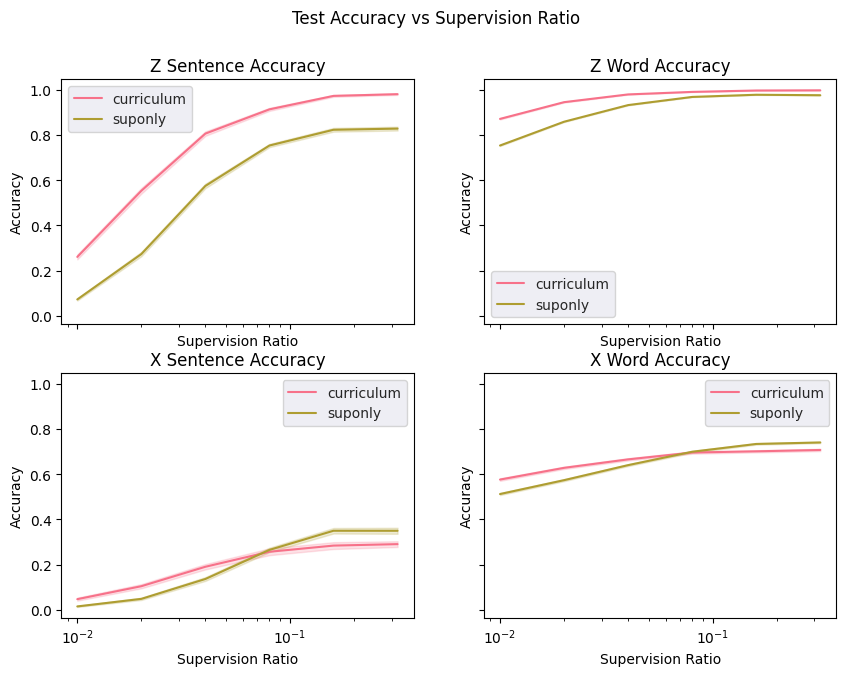

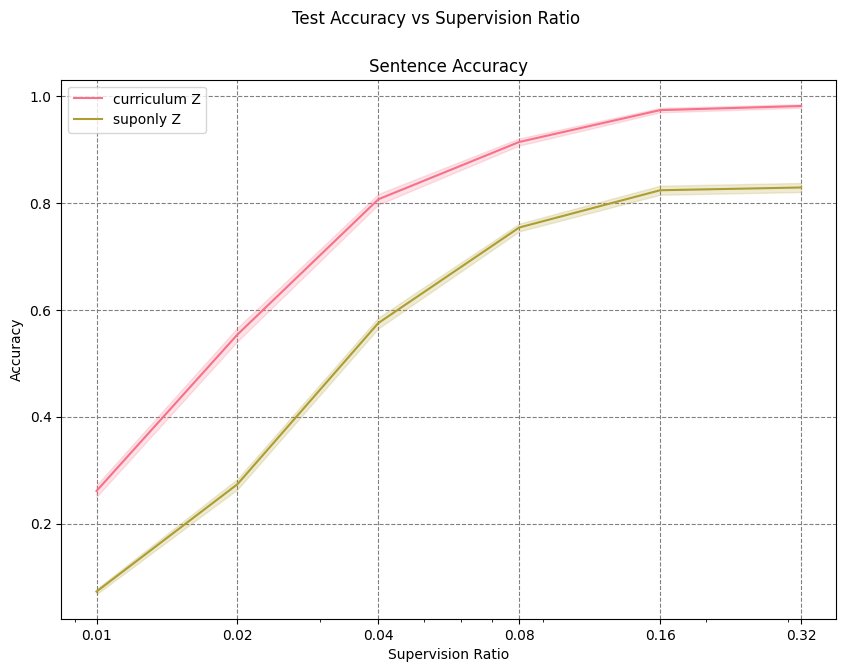

In [35]:
entity, project = "mh-amani1998", "scan_sigmae"  
runs = api.runs(entity + "/" + project) 

summary_list, config_list, name_list = [], [], []
for run in runs: 
    # .summary contains output keys/values for 
    # metrics such as accuracy.
    #  We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict)
    config_list.append(
        {k: v for k,v in run.config.items()
        if not k.startswith('_')})
    # .name is the human-readable name of the run.
    name_list.append(run.name)

plot_accuracy_vs_supervision_ratio(summary_list, config_list, name_list)

In [6]:
entity, project = "mh-amani1998", "sfst_sigmae"  
runs = api.runs(entity + "/" + project) 

summary_list, config_list, name_list = [], [], []
for run in runs: 
    # .summary contains output keys/values for 
    # metrics such as accuracy.
    #  We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict)
    config_list.append(
        {k: v for k,v in run.config.items()
        if not k.startswith('_')})
    # .name is the human-readable name of the run.
    name_list.append(run.name)

plot_accuracy_vs_supervision_ratio(summary_list, config_list, name_list)

KeyError: 'test/autoreg_hidden_layer/sentence-accuracy-mean/Z'